In [1]:
import pandas as pd
import numpy as np
import os 
import glob
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()

'/opt/ml/code'

In [2]:
ensemble_files = glob.glob("prediction/logits/*.csv")
print(ensemble_files)

['prediction/logits/13th_maxlength_200_KoElectra_zero70%25checkpoint-6000_logit.csv', 'prediction/logits/12th_maxlength_200_KoElectra_zero50%25step5500_logit.csv', 'prediction/logits/14th_binary_classifications_norelationVSrelationcheckpoint-5500_logit.csv', 'prediction/logits/9th_maxlength_200_KoElectra13epochs_logit.csv']


### 단순평균

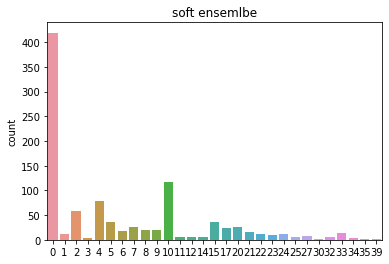

Counter({0: 419, 10: 117, 4: 78, 2: 59, 5: 37, 15: 37, 7: 25, 20: 25, 17: 24, 8: 20, 9: 20, 6: 17, 21: 16, 33: 14, 1: 12, 24: 12, 22: 11, 23: 9, 27: 8, 12: 6, 25: 6, 32: 6, 11: 5, 14: 5, 3: 4, 34: 3, 35: 2, 30: 2, 39: 1})


In [28]:
from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
sns.countplot(x = res.values.argmax(axis = -1))
plt.title('soft ensemlbe')
plt.show()
print(Counter(res.values.argmax(axis = -1)))
pd.DataFrame(res.values.argmax(axis=-1).flatten(), columns=['pred']).to_csv('./prediction/zeroratio_ensemble_simple_mean.csv', index=False)

### Softmax 평균

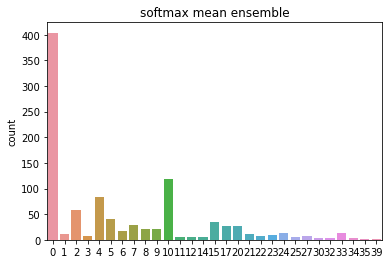

Counter({0: 404, 10: 119, 4: 84, 2: 59, 5: 40, 15: 35, 7: 28, 17: 27, 20: 26, 8: 21, 9: 21, 6: 18, 33: 14, 24: 13, 1: 12, 21: 12, 23: 10, 27: 8, 22: 8, 3: 7, 12: 6, 25: 6, 11: 5, 14: 5, 32: 4, 30: 3, 34: 3, 35: 1, 39: 1})


In [13]:
from scipy.special import softmax

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += softmax(pd.read_csv(f).values, axis = 1)
sns.countplot(x = res.values.argmax(axis = -1))
plt.title('softmax mean ensemble')
plt.show()
print(Counter(res.values.argmax(axis = -1)))

#### 데이터 %에 따른 가중평균

In [21]:
import re 
per = re.compile('\d+%')
int(per.findall( ensemble_files[1] )[0][:2])* 0.01

0.5

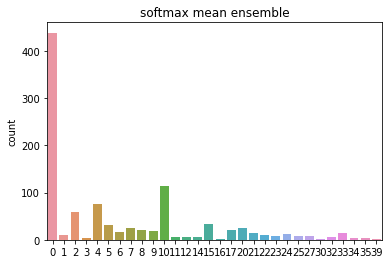

Counter({0: 439, 10: 115, 4: 76, 2: 59, 15: 33, 5: 32, 20: 26, 7: 24, 8: 21, 17: 20, 9: 18, 6: 17, 33: 14, 21: 14, 24: 13, 1: 10, 22: 10, 27: 8, 23: 8, 25: 8, 11: 6, 12: 5, 14: 5, 32: 5, 3: 4, 35: 3, 34: 3, 30: 2, 39: 1, 16: 1})


In [22]:
import re 
per = re.compile('\d+%')
per.findall( ensemble_files[3] )


res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    p = per.findall(f)
    if len(p) == 1:
        w = int(p[0][:2]) * 0.01
        res += pd.read_csv(f).values*w
    else:
        res += pd.read_csv(f).values
sns.countplot(x = res.values.argmax(axis = -1))
plt.title('softmax mean ensemble')
plt.show()
print(Counter(res.values.argmax(axis = -1)))

In [27]:
pd.DataFrame(res.values.argmax(axis=-1).flatten(), columns=['pred']).to_csv('./prediction/zeroratio_ensemble_weighted_mean.csv', index=False)

In [43]:
a = (pd.read_csv('prediction/6th_koelectra_basecheckpoint-5500.csv') == pd.read_csv("prediction/6th_koelectra_base_submission.csv"))

### Ensemble_2

- dir : prediction/logits/ensemble_2
- 'prediction/logits/ensemble_2/10th_maxlength_150_KoElectra14500step_13epochs_logit.csv',
- 'prediction/logits/ensemble_2/6th_koelectra_basecheckpoint-5500_logit.csv',
- 'prediction/logits/ensemble_2/9th_maxlength_200_KoElectra13epochs_logit.csv'

['prediction/logits/ensemble_2/10th_maxlength_150_KoElectra14500step_13epochs_logit.csv', 'prediction/logits/ensemble_2/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_2/9th_maxlength_200_KoElectra13epochs_logit.csv']


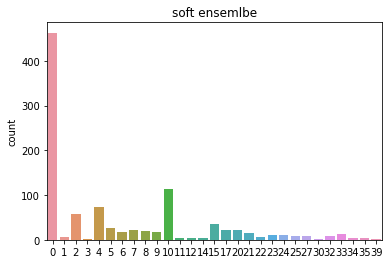

Counter({0: 463, 10: 114, 4: 73, 2: 57, 15: 36, 5: 27, 20: 23, 7: 22, 17: 21, 8: 20, 6: 18, 9: 17, 21: 16, 33: 13, 23: 10, 24: 10, 25: 9, 27: 8, 32: 8, 22: 7, 1: 6, 14: 4, 11: 4, 35: 4, 12: 3, 34: 3, 30: 2, 39: 1, 3: 1})


In [7]:
ensemble_files = glob.glob("prediction/logits/ensemble_2/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
sns.countplot(x = res.values.argmax(axis = -1))
plt.title('soft ensemlbe')
plt.show()
print(Counter(res.values.argmax(axis = -1)))
# pd.DataFrame(res.values.argmax(axis=-1).flatten(), columns=['pred']).to_csv('./prediction/ensemble_2.csv', index=False)

<br></br>
<br></br>

### Binary + Ensemble

In [74]:
ensemble_files = glob.glob("prediction/logits/ensemble_2/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

['prediction/logits/ensemble_2/10th_maxlength_150_KoElectra14500step_13epochs_logit.csv', 'prediction/logits/ensemble_2/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_2/9th_maxlength_200_KoElectra13epochs_logit.csv']


In [68]:
binary = pd.read_csv('./prediction/14th_binary_classifications_norelationVSrelationcheckpoint-5500.csv')

In [69]:
def weighted_label (data):
    if data > 0:
        return 1.8 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1
binary.pred.map( weighted_label )

0      1.8
1      1.8
2      1.8
3      1.0
4      1.0
      ... 
995    1.0
996    1.8
997    1.8
998    1.0
999    1.0
Name: pred, Length: 1000, dtype: float64

In [70]:
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))

Counter({0: 476, 10: 106, 4: 70, 2: 59, 15: 33, 5: 29, 8: 26, 17: 24, 7: 23, 20: 21, 9: 16, 6: 15, 33: 13, 24: 12, 23: 10, 27: 9, 1: 7, 21: 6, 25: 6, 35: 6, 22: 6, 32: 5, 14: 4, 30: 3, 12: 3, 34: 3, 3: 2, 39: 2, 28: 2, 11: 1, 19: 1, 16: 1})


In [71]:
pd.DataFrame(res.flatten(), columns=['pred'])

,pred
0,5
1,10
2,1
3,17
4,0
...,...
995,0
996,10
997,10
998,0


In [ ]:
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_3.csv', index=False)

<br></br>
<br></br>

### binary 기반 모두 예측

In [85]:
ensemble_files = glob.glob("prediction/logits/ensemble_2_3/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

binary = pd.read_csv('./prediction/14th_binary_classifications_norelationVSrelationcheckpoint-5500.csv')
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.7
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_3.csv', index=False)

['prediction/logits/ensemble_2/10th_maxlength_150_KoElectra14500step_13epochs_logit.csv', 'prediction/logits/ensemble_2/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_2/9th_maxlength_200_KoElectra13epochs_logit.csv']
Counter({0: 488, 10: 111, 4: 69, 2: 55, 15: 37, 8: 27, 5: 24, 7: 22, 20: 21, 17: 19, 6: 16, 24: 14, 9: 13, 33: 12, 23: 11, 21: 9, 27: 9, 1: 8, 25: 7, 22: 7, 14: 4, 30: 3, 12: 3, 3: 2, 39: 2, 32: 2, 35: 2, 34: 1, 19: 1, 16: 1})


<br></br>
<br></br>

### Ensemble4

In [102]:
ensemble_files = glob.glob("prediction/logits/ensemble_4/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv')
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.9
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_4.csv', index=False)

['prediction/logits/ensemble_4/10th_maxlength_150_KoElectra14500step_13epochs_logit.csv', 'prediction/logits/ensemble_4/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_4/20th_XlmRobert_large_maxlength20010epochs_logit.csv', 'prediction/logits/ensemble_4/9th_maxlength_200_KoElectra13epochs_logit.csv']
Counter({0: 521, 10: 101, 4: 71, 2: 55, 15: 30, 8: 24, 7: 22, 20: 19, 17: 17, 6: 16, 5: 13, 21: 13, 24: 12, 9: 12, 33: 11, 23: 9, 27: 8, 1: 7, 22: 7, 12: 6, 25: 6, 14: 5, 30: 4, 3: 3, 11: 2, 39: 1, 34: 1, 28: 1, 19: 1, 16: 1, 32: 1})


<br></br>
<br></br>

### Ensemble5,6

In [147]:
ensemble_files = glob.glob("prediction/logits/ensemble_5/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv')
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_5.csv', index=False)

['prediction/logits/ensemble_5/20th_XlmRobert_large_maxlength20010epochs_logit.csv', 'prediction/logits/ensemble_5/22th_XlmRobert_large_maxlength15020epochs_logit.csv', 'prediction/logits/ensemble_5/9th_maxlength_200_KoElectra13epochs_logit.csv']
Counter({0: 489, 10: 104, 4: 73, 2: 55, 15: 34, 5: 25, 7: 23, 8: 21, 20: 20, 17: 20, 6: 18, 33: 14, 21: 14, 9: 14, 24: 11, 27: 8, 22: 8, 1: 7, 23: 7, 12: 6, 25: 6, 14: 4, 11: 4, 32: 3, 3: 2, 35: 2, 30: 2, 39: 1, 34: 1, 28: 1, 19: 1, 16: 1, 38: 1})


In [134]:
a = pd.read_csv('./prediction/23th_ensemble_5.csv')
new = pd.read_csv('./prediction/ensemble_5.csv')

In [140]:
a = pd.read_csv('./prediction/9th_maxlength_200_KoElectra13epochs.csv')
new = pd.read_csv('./prediction/22th_XlmRobert_large_maxlength15020epochs.csv')

In [141]:
sum((a == new).values)

array([801])

<br></br>
<br></br>

### Ensemble7 (6)

In [146]:
ensemble_files = glob.glob("prediction/logits/ensemble_5/*Xlm*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv') 
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.5
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_6.csv', index=False)

['prediction/logits/ensemble_5/20th_XlmRobert_large_maxlength20010epochs_logit.csv', 'prediction/logits/ensemble_5/22th_XlmRobert_large_maxlength15020epochs_logit.csv']
Counter({0: 535, 10: 97, 4: 65, 2: 50, 15: 36, 7: 22, 8: 21, 6: 17, 20: 15, 17: 15, 21: 14, 5: 14, 9: 13, 33: 10, 22: 10, 1: 9, 23: 8, 24: 8, 27: 6, 12: 6, 14: 6, 25: 6, 11: 4, 3: 2, 32: 2, 35: 2, 30: 2, 39: 1, 34: 1, 19: 1, 16: 1, 13: 1})


In [172]:
print(Counter(list(pd.read_csv('prediction/25th_ensemble_6.csv').pred.values)))

Counter({0: 535, 10: 97, 4: 65, 2: 50, 15: 36, 7: 22, 8: 21, 6: 17, 20: 15, 17: 15, 21: 14, 5: 14, 9: 13, 33: 10, 22: 10, 1: 9, 23: 8, 24: 8, 27: 6, 12: 6, 14: 6, 25: 6, 11: 4, 3: 2, 32: 2, 35: 2, 30: 2, 39: 1, 34: 1, 19: 1, 16: 1, 13: 1})


<br></br>
<br></br>

### Ensemble 8

In [183]:
ensemble_files = glob.glob("prediction/logits/ensemble_8/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv') 
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.2
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_8.csv', index=False)

['prediction/logits/ensemble_test/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_test/XLMRoberta_reduceSentence_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_test/20th_XlmRobert_large_maxlength20010epochs_logit.csv', 'prediction/logits/ensemble_test/22th_XlmRobert_large_maxlength15020epochs_logit.csv']
Counter({0: 546, 10: 93, 4: 63, 2: 52, 15: 35, 8: 22, 7: 21, 6: 17, 20: 16, 21: 16, 17: 14, 9: 12, 5: 12, 33: 10, 22: 9, 24: 9, 27: 7, 12: 7, 1: 6, 14: 6, 23: 5, 25: 4, 11: 4, 39: 2, 32: 2, 19: 2, 30: 2, 34: 1, 3: 1, 16: 1, 35: 1, 13: 1, 38: 1})


<br></br>
<br></br>

### Ensemble 9

In [368]:
ensemble_files = glob.glob("prediction/logits/ensemble_9_10/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

# binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv')
binary = pd.read_csv('./prediction/ensemble_binary.csv')
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.3
min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
# pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_9.csv', index=False)

['prediction/logits/ensemble_9_10/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_9_10/XLMRoberta_reduceSentence_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/20th_XlmRobert_large_maxlength20010epochs_logit.csv']
Counter({0: 551, 10: 93, 4: 67, 2: 53, 15: 33, 8: 25, 7: 21, 21: 16, 17: 16, 6: 16, 20: 15, 9: 13, 5: 12, 33: 11, 22: 9, 27: 8, 24: 8, 12: 7, 23: 5, 1: 4, 14: 4, 11: 4, 25: 2, 39: 1, 30: 1, 34: 1, 3: 1, 19: 1, 16: 1, 32: 1})


<br></br>
<br></br>

### Ensemble_10

In [325]:
ensemble_files = glob.glob("prediction/logits/ensemble_9_10/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
    
binary = pd.read_csv('./prediction/ensemble_binary.csv')
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_10.csv', index=False)

['prediction/logits/ensemble_9_10/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_9_10/XLMRoberta_reduceSentence_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/20th_XlmRobert_large_maxlength20010epochs_logit.csv']
Counter({0: 526, 10: 95, 4: 69, 2: 56, 15: 34, 8: 25, 7: 22, 17: 19, 5: 18, 20: 17, 21: 16, 6: 16, 9: 14, 33: 12, 22: 9, 27: 8, 24: 8, 12: 7, 1: 5, 23: 5, 14: 5, 11: 5, 25: 2, 39: 1, 30: 1, 34: 1, 3: 1, 19: 1, 16: 1, 32: 1})


<br></br>
<br></br>

### Ensemble 11

In [326]:
ensemble_files = glob.glob("prediction/logits/ensemble_9_10/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

# binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv')
binary = pd.read_csv('./prediction/ensemble_binary.csv')
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1.1
# min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
# res = res.values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_11.csv', index=False)

['prediction/logits/ensemble_9_10/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_9_10/XLMRoberta_reduceSentence_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/20th_XlmRobert_large_maxlength20010epochs_logit.csv']
Counter({0: 537, 10: 94, 4: 68, 2: 55, 15: 33, 8: 25, 7: 22, 17: 18, 20: 17, 21: 16, 6: 16, 5: 14, 9: 13, 33: 11, 22: 9, 27: 8, 24: 8, 12: 7, 1: 5, 23: 5, 14: 5, 11: 5, 25: 2, 39: 1, 30: 1, 34: 1, 3: 1, 19: 1, 16: 1, 32: 1})


<br></br>
<br></br>

### Ensemble 12

In [338]:
ensemble_files = glob.glob("prediction/logits/ensemble_9_10/*.csv")
print(ensemble_files)

from collections import Counter

res = pd.DataFrame(np.zeros((1000,42)))
for f in ensemble_files:
    if 'binary' in f:
        continue
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

# binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv')
binary = pd.read_csv('./prediction/hard_ensemble_binary.csv')
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 2
# min_one_df = res + abs(res.min())+1
res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
# res = res.values.argmax(axis=1)
print(Counter(res))
# pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_11.csv', index=False)

['prediction/logits/ensemble_9_10/XLMRoberta_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/6th_koelectra_basecheckpoint-5500_logit.csv', 'prediction/logits/ensemble_9_10/XLMRoberta_reduceSentence_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/ensemble_9_10/20th_XlmRobert_large_maxlength20010epochs_logit.csv']
Counter({0: 566, 10: 91, 4: 65, 2: 52, 15: 32, 8: 25, 7: 21, 21: 16, 6: 16, 20: 15, 17: 14, 9: 13, 33: 11, 5: 9, 27: 8, 24: 8, 12: 7, 22: 7, 1: 4, 14: 4, 11: 4, 23: 3, 25: 2, 39: 1, 30: 1, 34: 1, 3: 1, 19: 1, 16: 1, 32: 1})


<br></br>
<br></br>

### Binary Ensemble

In [222]:
ensemble_files = glob.glob("prediction/logits/binary/*.csv")
print(ensemble_files)
print(len(ensemble_files))

from collections import Counter

res = pd.DataFrame(np.zeros((1000,2)))
for f in ensemble_files:
    res += pd.read_csv(f).values
    
# sns.countplot(x = res.values.argmax(axis = -1))
# plt.title('soft ensemlbe')
# plt.show()
# print(Counter(res.values.argmax(axis = -1)))

# binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv')
binary = pd.read_csv('./prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv')
# 3600 이 더많이 0으로 예측함
def weighted_label (data):
    if data > 0:
        return 1 # 비율설정 특정 index에 더 값을 곱한다..
    else:
        return 1
min_one_df = res + abs(res.min())+1


res = pd.concat([min_one_df.iloc[:,0] * binary.pred.map( weighted_label ), min_one_df.iloc[:,1:]], axis=1).values.argmax(axis=1)
print(Counter(res))
pd.DataFrame(res.flatten(), columns=['pred']).to_csv('./prediction/ensemble_binary.csv', index=False)

['prediction/logits/binary/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2200_logit.csv', 'prediction/logits/binary/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2800_logit.csv', 'prediction/logits/binary/XLMRoberta_binary_classificationscheckpoint-2500_logit.csv', 'prediction/logits/binary/XLMRoberta_binary_classificationscheckpoint-3600_logit.csv']
4
Counter({1: 507, 0: 493})


<br></br>
<br></br>

### Hard Voting!!
  
- binary 

In [295]:
def get_onehot_vector(f, label=2):
    res = []
    for v in pd.read_csv(f).pred.values:
        a = [0]*label
        a[v] = 1
        res.append(a)
    res = np.asarray(res)
    return res

In [333]:
binary = glob.glob('prediction/XLM*inary*.csv')
print(binary)
res = np.zeros((1000,2))
for f in binary:
    res += get_onehot_vector(f)
pd.DataFrame({"pred":res.argmax(axis=1)}).to_csv('./prediction/hard_ensemble_binary.csv', index = False)

['prediction/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2200.csv', 'prediction/XLMRoberta_Binary_ReduceSentenceQuery_Maxlength150checkpoint-2800.csv', 'prediction/XLMRoberta_binary_classificationscheckpoint-2500.csv', 'prediction/XLMRoberta_binary_classificationscheckpoint-3600.csv']


- labeling

In [332]:
files = glob.glob('prediction/hard_voting/*.csv')
res = np.zeros((1000,42))
for f in files:
    res += get_onehot_vector(f, label=42)
print(Counter(res.argmax(axis=1)))
pd.DataFrame({"pred":res.argmax(axis=1)}).to_csv('./prediction/hard_ensemble_1.csv', index = False)

Counter({0: 548, 10: 93, 4: 64, 2: 52, 15: 33, 7: 22, 8: 22, 6: 17, 20: 16, 21: 16, 17: 14, 9: 14, 5: 12, 33: 10, 22: 9, 24: 9, 27: 7, 12: 7, 1: 6, 14: 6, 23: 5, 11: 5, 30: 3, 25: 3, 3: 2, 39: 1, 34: 1, 19: 1, 16: 1, 32: 1})
